# LSTM 알고리즘을 이용하여 주가 예측하기

- Long Short-Term Memory models(LSTM)
  - Recurrent Neural Networks의 하나
  - 순서가 중요한 feature의 요소일 때 사용
  - 문장 안에서 단어의 순서가 중요한 경우나 시계열 데이터셋에서 효과적인 모델
  - 자연어 처리 분야에서 많이 사용되는 알고리즘
  - dequence를 저장하고 이를 학습에 활용
- 일자(date), 시가(open), 고가(high), 저가(low), 거래량(volume)을 토대로 미래의 주가인 내일의 종가(close)를 예측


# 주가 데이터를 가져와서 데이터프레임 형태로 저장하기

- 라이브러리 설치하기
  - yfinance
  - pandas_datareader


In [ ]:
import numpy as np
import pandas as pd
import yfinance as yfin
from pandas_datareader import data

- 엔비디아(NVDA) 2023년 1월 1일부터 2024년 5월 28일까지 주가 가져오기


In [26]:
df_price = yfin.download("NVDA", start="2023-01-01", end="2024-05-28")

C:\Users\bbang\AppData\Local\Temp\ipykernel_6516\1026581699.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_price = yfin.download("NVDA", start="2023-01-01", end="2024-05-28")
[*********************100%***********************]  1 of 1 completed


In [27]:
df_price.describe()

Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
count,351.000000,351.000000,351.000000,351.000000,3.510000e+02
mean,48.741080,49.522243,47.816600,48.670081,4.806715e+08
std,22.562073,22.991867,22.097076,22.590295,1.576498e+08
min,14.252331,14.551065,14.021538,14.461147,1.982090e+08
25%,28.761825,28.950187,28.178742,28.583949,3.825845e+08
50%,45.153938,45.764607,44.288398,44.825419,4.449350e+08
75%,59.546001,59.678443,57.879243,58.753354,5.358305e+08
max,106.426628,106.432622,102.959007,104.407428,1.543911e+09


- info() 메서드
  - 데이터에 대한 전반적인 정보(행과 열의 크기, 컬럼명, 컬럼을 구성하는 값의 자료형 등)


In [28]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 351 entries, 2023-01-03 to 2024-05-24
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, NVDA)   351 non-null    float64
 1   (High, NVDA)    351 non-null    float64
 2   (Low, NVDA)     351 non-null    float64
 3   (Open, NVDA)    351 non-null    float64
 4   (Volume, NVDA)  351 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 16.5 KB


# 주가 데이터를 그래프로 출력하기


In [7]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

- reset_index() 메서드
  - 기존에 설정되어 있는 행 인덱스를 제거하고 그 인덱스를 데이터 열(columns)로 추가하는 방식
- set_index() 메서드
  - 기존에 있던 행 인덱스를 제거하고 데이터 열(columns) 중 하나를 인덱스로 재설정하는 방법


In [29]:
df_price.reset_index(inplace=True)
df_price

Price,Date,Close,High,Low,Open,Volume
Ticker,,NVDA,NVDA,NVDA,NVDA,NVDA
0,2023-01-03,14.302286,14.982682,14.083481,14.837810,401277000
1,2023-01-04,14.735901,14.839809,14.228353,14.554063,431324000
2,2023-01-05,14.252331,14.551065,14.135434,14.478130,389168000
3,2023-01-06,14.845805,14.996671,14.021538,14.461147,405044000
4,2023-01-09,15.614121,16.041741,15.127553,15.270427,504231000
...,...,...,...,...,...,...
346,2024-05-20,94.742294,95.162125,93.402831,93.712705,318764000
347,2024-05-21,95.348045,95.362040,93.142922,93.561754,328946000
348,2024-05-22,94.912216,95.981790,93.211897,95.421016,548648000


- matplotlib,pyplot으로 주식 종가 그래프 그리기


Text(0, 0.5, 'Price($)')

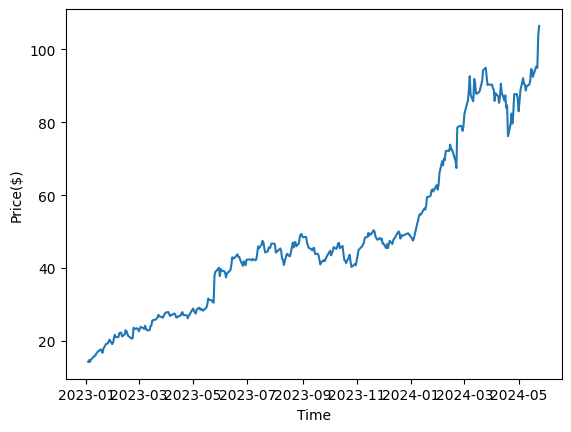

In [39]:
close = df_price["Close"].values.flatten()
date = df_price["Date"].values.flatten()

plt.Figure(figsize=(16, 9))
sns.lineplot(y=close, x=date)
plt.xlabel("Time")
plt.ylabel("Price($)")
